In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# post-hoc
predictions = np.load('../experiments/predict_video_exp.npy')
# real-time 
onset_times = np.load('../experiments/onset_times_video_exp.npy')

In [3]:
stim_on = 3
# in seconds, when did the animal perform behavior 2
behavior_times = np.where(predictions==stim_on)[0]/10
behavior_times

array([1.4000e+00, 1.6000e+00, 1.8000e+00, ..., 3.8817e+03, 3.8818e+03,
       3.8824e+03])

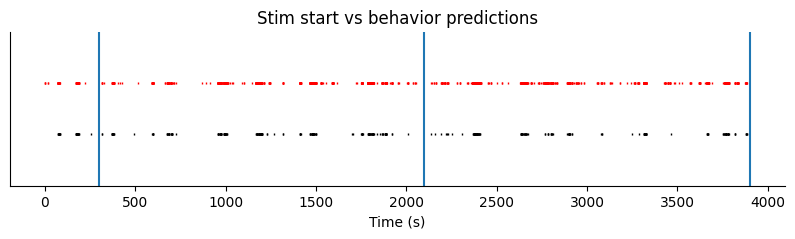

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
ax.plot(onset_times,
        np.ones_like(onset_times),
        ls='', marker='|', markersize=1, c='k', alpha=1)
ax.plot(behavior_times,
        np.ones_like(behavior_times)+0.5,
        ls='', marker='|', markersize=1, c='r', alpha=1)
ax.set_yticks([])
ax.set_ylim([0.5, 2])
# ax.set_xlim([50, 100])
ax.vlines(5*60, 0.5, 2)
ax.vlines(35*60, 0.5, 2)
ax.vlines(65*60, 0.5, 2)
ax.set_ylim([0.5, 2])

ax.set_title('Stim start vs behavior predictions')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Time (s)')
plt.show()

In [10]:
num_behaviors_post, len(onset_times)

(320, 349)

In [7]:
idx_start = np.where(np.diff(predictions)!=0)[0]+1
num_behaviors_post = np.unique([predictions[id_start] for id_start in idx_start if id_start < 35*60*10], 
                               return_counts=True)[1][stim_on]

if len(onset_times[onset_times<35*60])<num_behaviors_post:
    print(f'this session matched behavior {stim_on} *** {len(onset_times[onset_times<35*60])/num_behaviors_post*100}% of the time')
else:
    print(f'this session matched behavior {stim_on} *** {num_behaviors_post/len(onset_times[onset_times<35*60])*100}% of the time')


this session matched behavior 3 *** 63.582089552238806% of the time


In [8]:
idx_start = np.where(np.diff(predictions)!=0)[0]+1
num_behaviors_post = np.unique([predictions[id_start] for id_start in idx_start if id_start >= 35*60*10], 
                               return_counts=True)[1][stim_on]

if len(onset_times[onset_times>=35*60])<num_behaviors_post:
    print(f'this session matched behavior {stim_on} *** {len(onset_times[onset_times>=35*60])/num_behaviors_post*100}% of the time')
else:
    print(f'this session matched behavior {stim_on} *** {num_behaviors_post/len(onset_times[onset_times>=35*60])*100}% of the time')


this session matched behavior 3 *** 42.5% of the time


In [ ]:
idx_start = np.where(np.diff(predictions)!=0)[0]+1
num_behaviors_post = np.unique([predictions[id_start] for id_start in idx_start], return_counts=True)[1][stim_on]

if len(onset_times)<num_behaviors_post:
    print(f'this session matched behavior {stim_on} *** {len(onset_times)/num_behaviors_post*100}% of the time')
else:
    print(f'this session matched behavior {stim_on} *** {num_behaviors_post/len(onset_times)*100}% of the time')
